# 1 EDA Operations

In [1]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

In [2]:
df = pd.read_pickle("data/staySpain_transformed.pkl")

In [3]:
df_operations = df.copy()

In [4]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9650 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 9650 non-null   int64         
 1   name                         9650 non-null   object        
 2   description                  9650 non-null   object        
 3   host_id                      9650 non-null   int64         
 4   neighbourhood_name           9650 non-null   object        
 5   neighbourhood_district       5860 non-null   object        
 6   room_type                    9650 non-null   object        
 7   accommodates                 9650 non-null   int64         
 8   bathrooms                    9576 non-null   Int64         
 9   bedrooms                     9581 non-null   Int64         
 10  beds                         9605 non-null   Int64         
 11  amenities_list               9634 non-null   obj

In [5]:
df_operations.describe()

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,pricexperson,minimum_nights,maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,general_satisf,reviews_per_month,insert_date,amenities_score
count,9.650000e+03,9.650000e+03,9650.000000,9576.0,9581.0,9605.0,9650.000000,9650.000000,9650.000000,9650.000000,...,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7120.000000,9650,9650.000000
mean,2.122473e+07,9.096714e+07,4.267047,1.593567,1.93675,2.922124,1035.775373,261.521630,4.969948,758.793575,...,9.445490,9.310817,9.620921,9.618925,9.539404,9.134958,9.507111,123.525140,2019-07-22 16:33:04.663212544,44.838342
min,1.196400e+04,1.070400e+04,1.000000,0.0,0.0,0.0,60.000000,9.090909,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2017-01-04 00:00:00,0.000000
25%,1.332096e+07,1.506455e+07,2.000000,1.0,1.0,1.0,450.000000,150.000000,1.000000,60.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.200000,18.000000,2018-11-07 00:00:00,32.000000
50%,2.065612e+07,6.569780e+07,4.000000,1.0,2.0,2.0,750.000000,208.000000,2.000000,1125.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.800000,58.000000,2019-08-31 00:00:00,44.000000
75%,3.016933e+07,1.429782e+08,6.000000,2.0,3.0,4.0,1250.000000,300.000000,4.000000,1125.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,177.000000,2020-05-11 00:00:00,57.000000
max,4.806155e+07,3.874783e+08,29.000000,13.0,50.0,30.0,28571.000000,12643.000000,1125.000000,1125.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1273.000000,2021-02-27 00:00:00,99.000000
std,1.161793e+07,8.717483e+07,2.588807,0.990406,1.375512,2.268378,983.394042,261.865544,17.986676,498.813539,...,0.960998,1.012684,0.838060,0.840214,0.784811,1.006620,0.681911,152.729857,NaN,17.165378


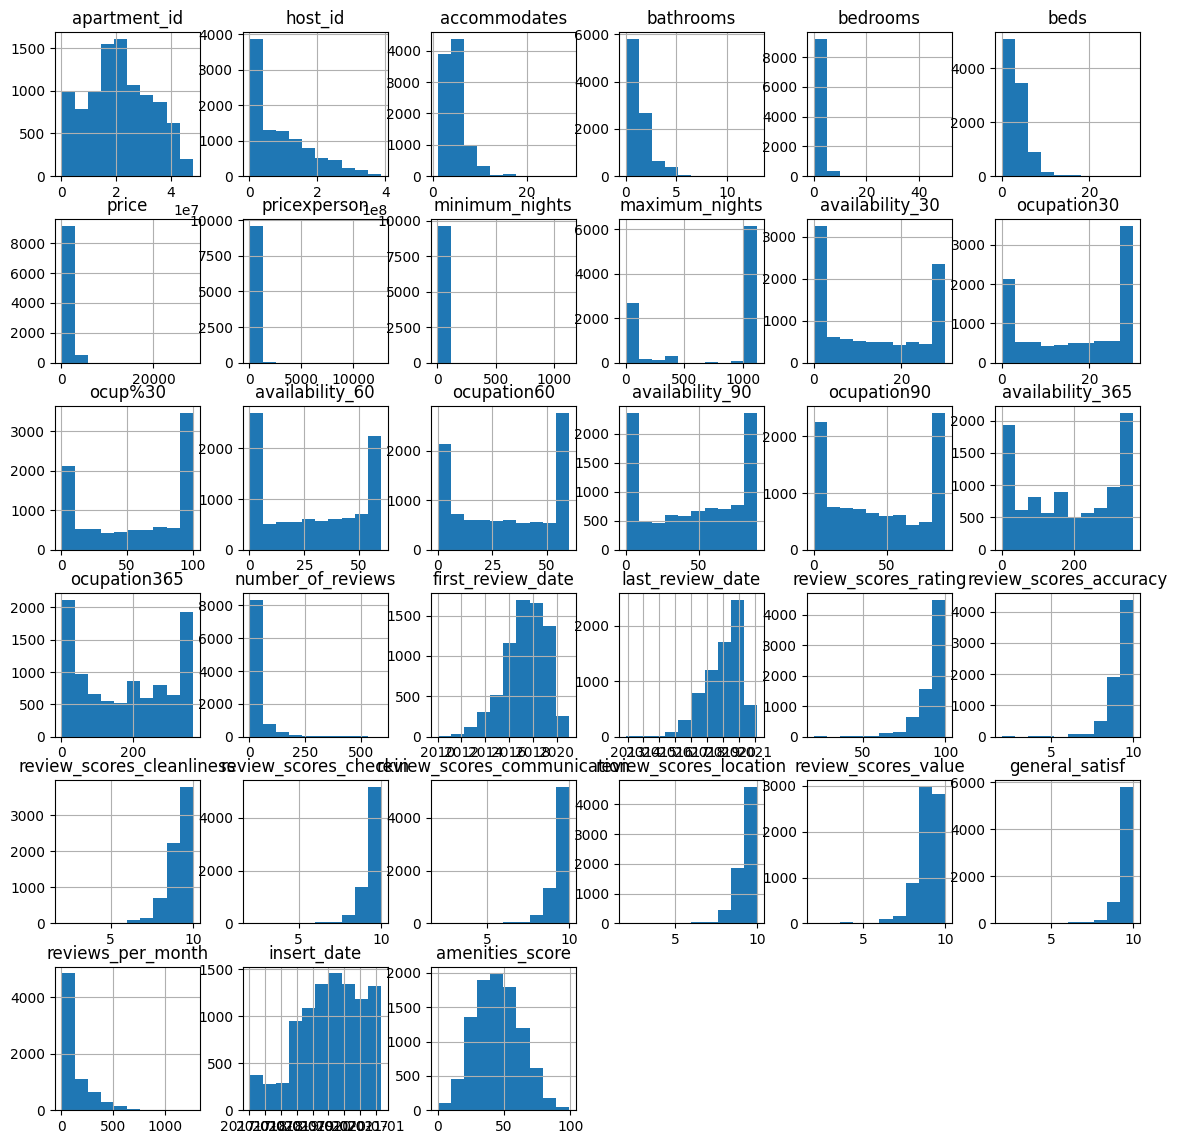

In [6]:
df_operations.hist(figsize=(14,14))
plt.show()

Com afecta el nombre d'habitacions, banys i llits
disponibles a la disponibilitat mitjana dels allotjaments? Difereix entre ciutats?


Variables: bathrooms, bedrooms, beds, ocupación 30, ciudad

In [7]:
df_operations.groupby(by='city')['ocup%30'].mean()

city
Barcelona    60.112787
Girona       50.511785
Madrid       60.885661
Malaga       57.321429
Mallorca     53.674458
Menorca      52.385321
Sevilla      50.215924
Valencia     55.438596
Name: ocup%30, dtype: float64

In [8]:
variables_numericas = ['bedrooms', 'bathrooms', 'beds']
df_operations = df_operations.dropna(subset=variables_numericas)
df_operations['bedrooms'] = df_operations['bedrooms'].astype('int64')
df_operations['beds'] = df_operations['beds'].astype('int64')
df_operations['bathrooms'] = df_operations['bathrooms'].astype('int64')

## Detección de outliers

Variable: Beds

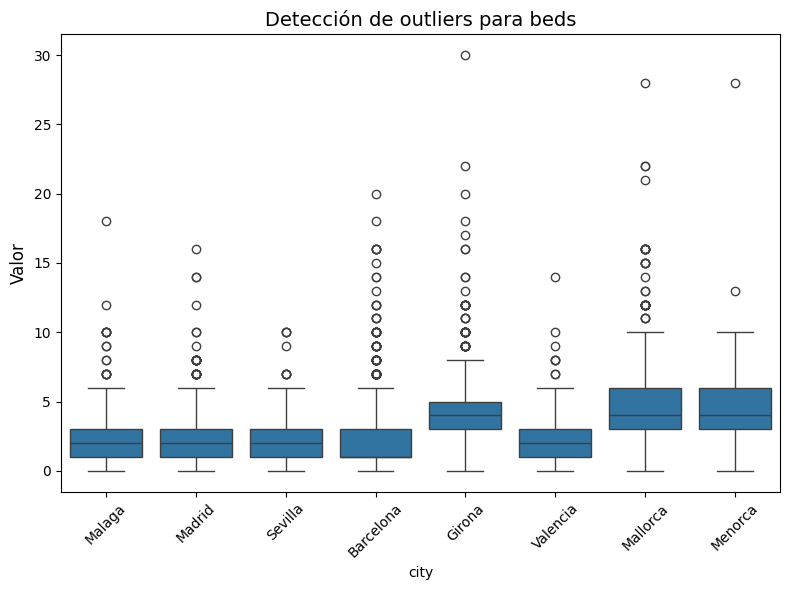

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_operations, x='city', y='beds', orient='v')
plt.title('Detección de outliers para beds', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

Variable: bedrooms

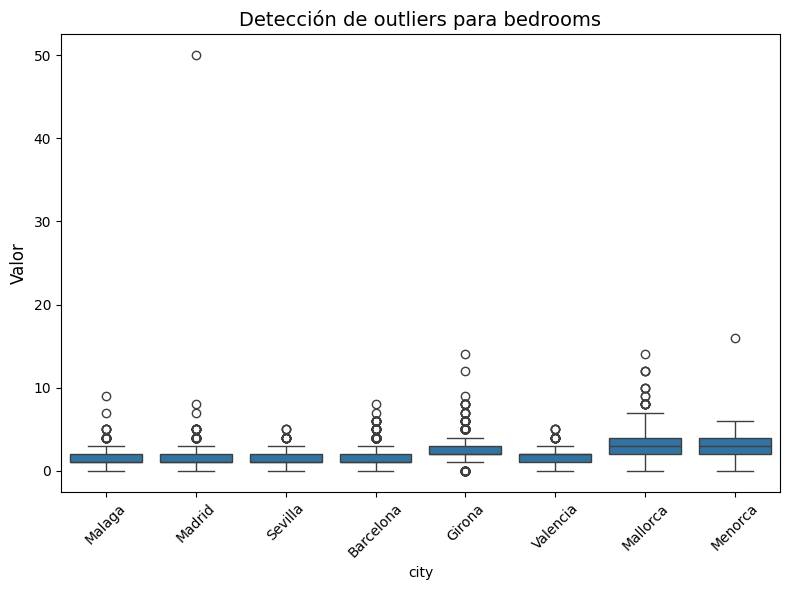

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_operations, x='city', y='bedrooms', orient='v')
plt.title('Detección de outliers para bedrooms', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

Variable: bathrooms

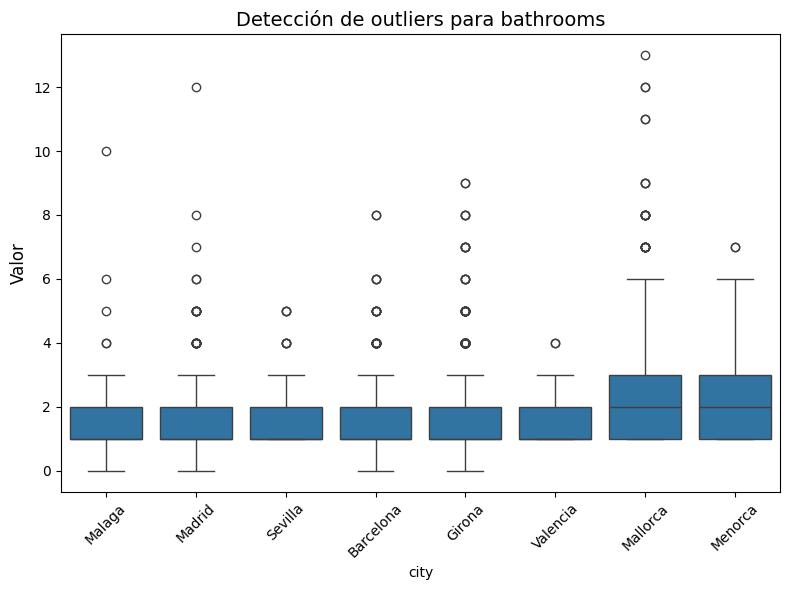

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_operations, x='city', y='bathrooms', orient='v')
plt.title('Detección de outliers para bathrooms', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Valor', fontsize=12)
plt.tight_layout()
plt.show()

## Correlación entre variables - General

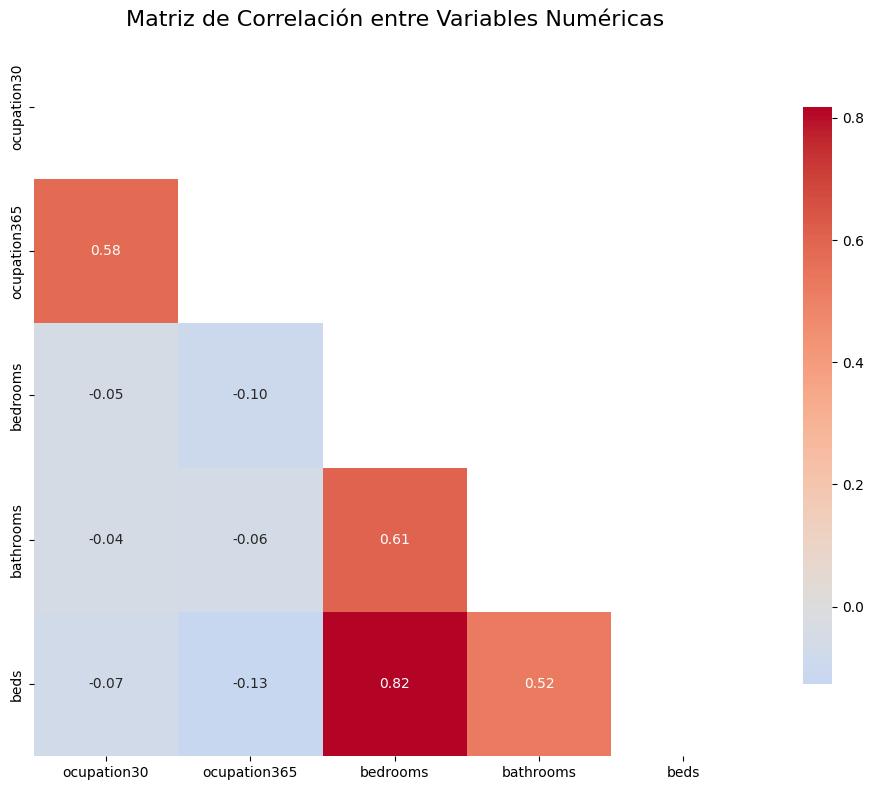

In [12]:

variables_numericas = ['ocupation30','ocupation365', 'bedrooms', 'bathrooms', 'beds']

# Calcular matriz de correlación
correlation_matrix = df[variables_numericas].corr(method='spearman')

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9470 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 9470 non-null   int64         
 1   name                         9470 non-null   object        
 2   description                  9470 non-null   object        
 3   host_id                      9470 non-null   int64         
 4   neighbourhood_name           9470 non-null   object        
 5   neighbourhood_district       5706 non-null   object        
 6   room_type                    9470 non-null   object        
 7   accommodates                 9470 non-null   int64         
 8   bathrooms                    9470 non-null   int64         
 9   bedrooms                     9470 non-null   int64         
 10  beds                         9470 non-null   int64         
 11  amenities_list               9454 non-null   obj

## Líneas de tendencia

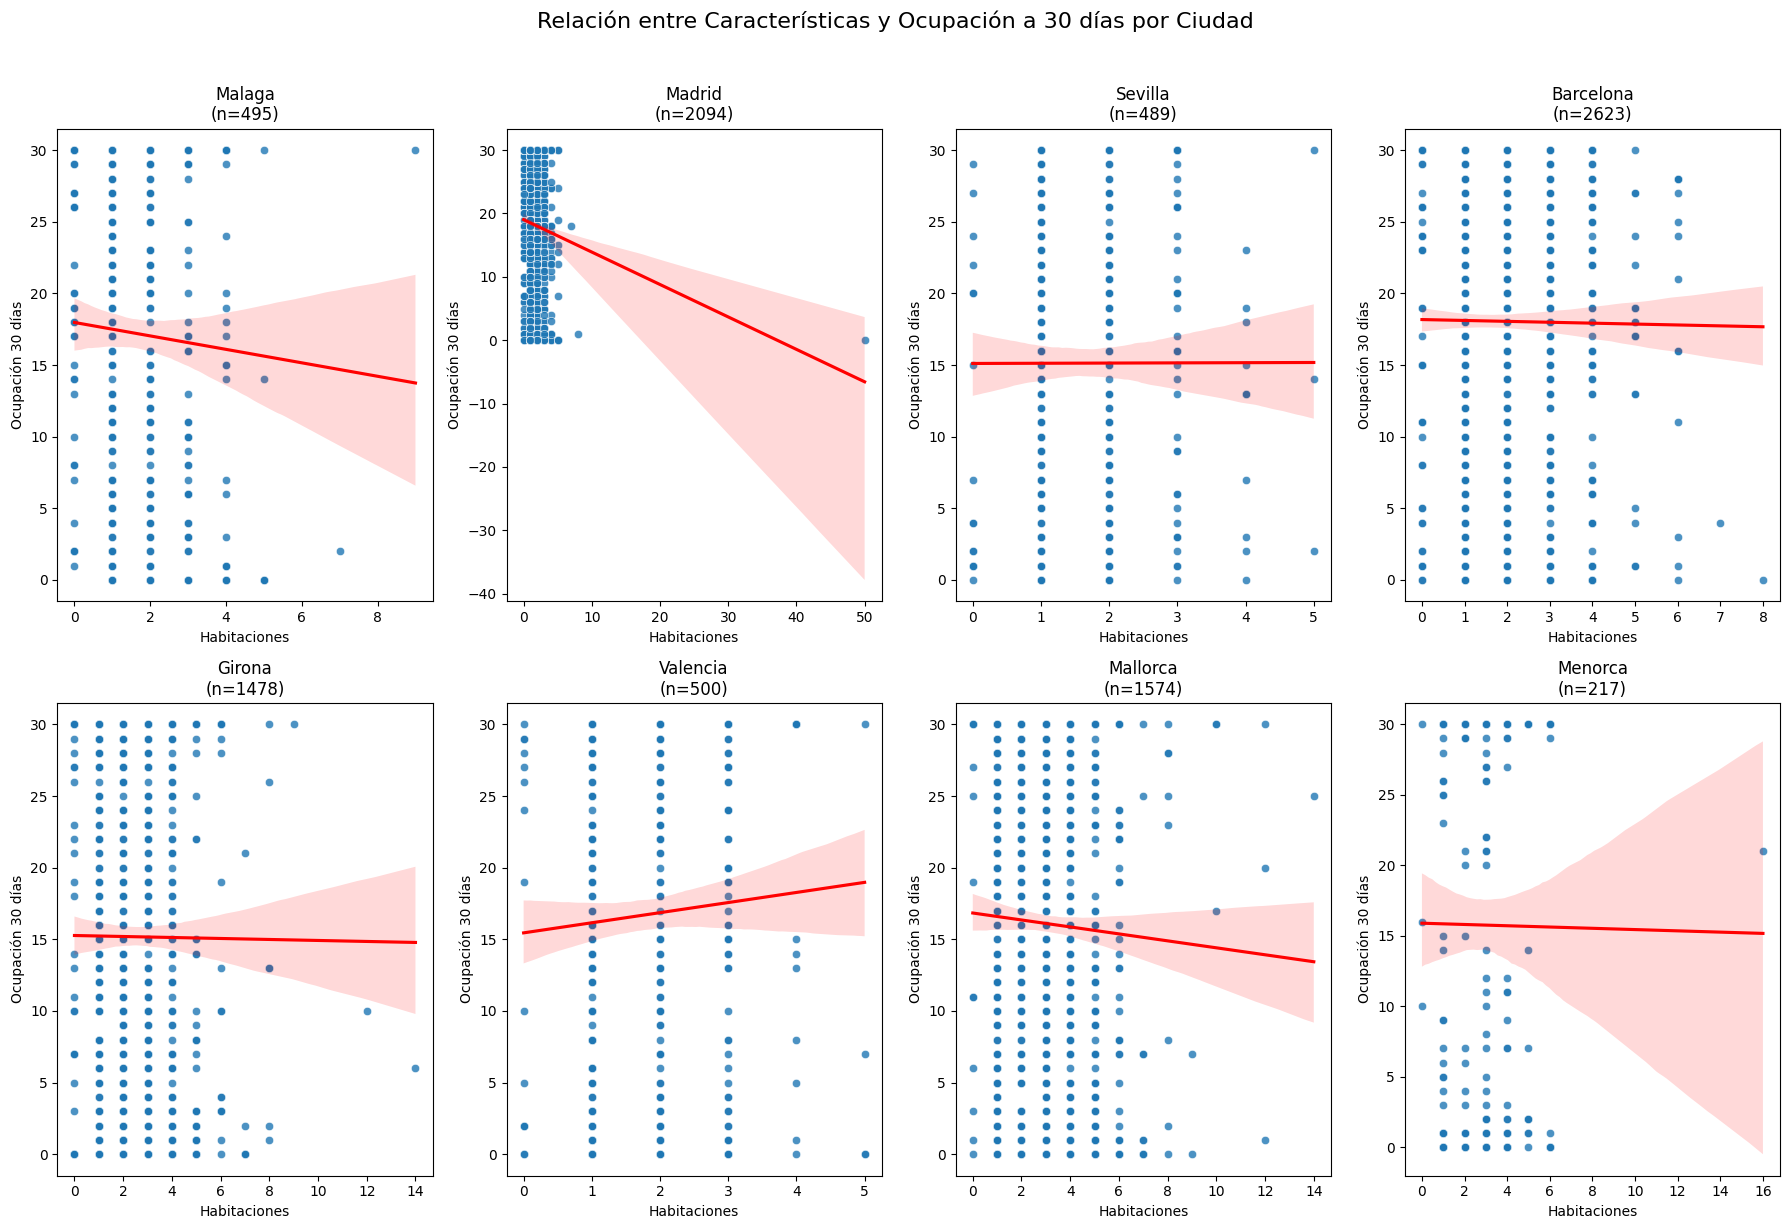

In [14]:
# Crear subplots para cada característica
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Relación entre Características y Ocupación a 30 días por Ciudad', 
             fontsize=16, y=1.02)

# Habitaciones vs Ocupación
for i, ciudad in enumerate(df_operations['city'].unique()):
    if i < 9:  
        df_ciudad = df_operations[df_operations['city'] == ciudad]
        row, col = i // 4, i % 4
        
        sns.scatterplot(data=df_ciudad, x='bedrooms', y='ocupation30', 
                       alpha=0.8, ax=axes[row, col])
        sns.regplot(data=df_ciudad, x='bedrooms', y='ocupation30', 
                   scatter=False, color='red', ax=axes[row, col])
        axes[row, col].set_title(f'{ciudad}\n(n={len(df_ciudad)})')
        axes[row, col].set_xlabel('Habitaciones')
        axes[row, col].set_ylabel('Ocupación 30 días')

# Ocultar ejes vacíos si hay menos de 6 ciudades
for i in range(len(df_operations['city'].unique()), 8):
    row, col = i // 4, i % 4
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

## Correlación entre variables independientes

In [15]:
# Correlación global entre nº de habitaciones y ocupación (%)
corr_global = df_operations['bedrooms'].corr(df_operations['ocup%30'])
print(f"🔹 Correlación global entre habitaciones y ocupación (30 días): {corr_global:.2f}")

# Correlación por ciudad
corr_por_ciudad = (
    df_operations.groupby('city')[['bedrooms', 'ocup%30']]
    .corr()
    .iloc[0::2, -1]  # selecciona solo la correlación bedrooms vs ocup%30
    .reset_index()
    .rename(columns={'ocup%30': 'correlacion'})
)

print("\n🔸 Correlación por ciudad:")
print(corr_por_ciudad)


🔹 Correlación global entre habitaciones y ocupación (30 días): -0.05

🔸 Correlación por ciudad:
        city   level_1  correlacion
0  Barcelona  bedrooms    -0.005285
1     Girona  bedrooms    -0.003706
2     Madrid  bedrooms    -0.060732
3     Malaga  bedrooms    -0.046923
4   Mallorca  bedrooms    -0.030794
5    Menorca  bedrooms    -0.005476
6    Sevilla  bedrooms     0.001045
7   Valencia  bedrooms     0.055794


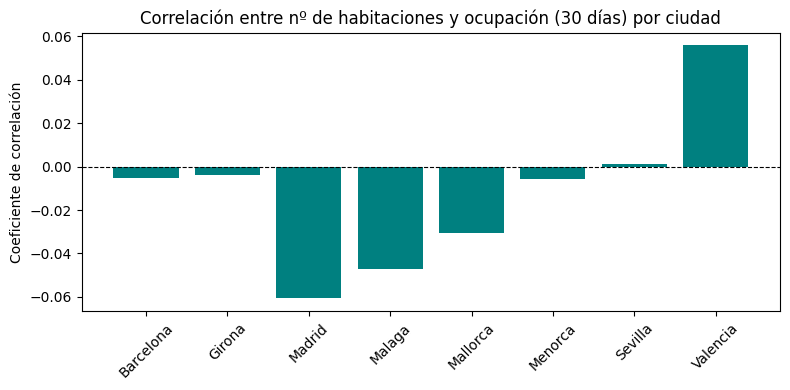

In [16]:
plt.figure(figsize=(8,4))
plt.bar(corr_por_ciudad['city'], corr_por_ciudad['correlacion'], color='teal')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Correlación entre nº de habitaciones y ocupación (30 días) por ciudad')
plt.ylabel('Coeficiente de correlación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔹 Correlación global entre baños y ocupación (30 días): -0.05
🔹 Correlación global entre camas y ocupación (30 días): -0.07


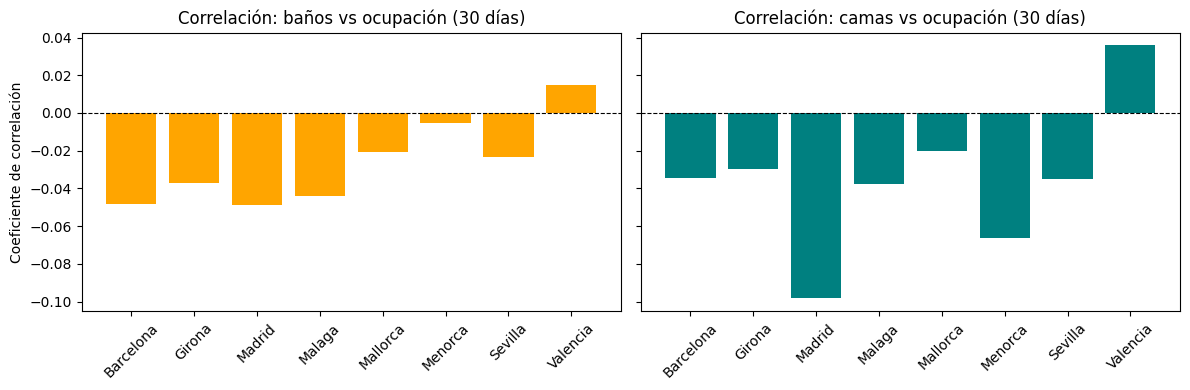

In [17]:
# --- Paso 1: preparar datos ---
cols = ['city', 'bathrooms', 'beds', 'ocup%30']
df = df_operations[cols].copy()

# Coerción numérica
for c in ['bathrooms', 'beds', 'ocup%30']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Filtro de filas válidas
df = df.dropna(subset=['bathrooms', 'beds', 'ocup%30', 'city'])

# --- Paso 2: correlaciones globales ---
corr_bath_global = df['bathrooms'].corr(df['ocup%30'])
corr_beds_global = df['beds'].corr(df['ocup%30'])

print(f"🔹 Correlación global entre baños y ocupación (30 días): {corr_bath_global:.2f}")
print(f"🔹 Correlación global entre camas y ocupación (30 días): {corr_beds_global:.2f}")

# --- Paso 3: correlación por ciudad ---
corr_ciudad_bath = (
    df.groupby('city')[['bathrooms', 'ocup%30']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'ocup%30': 'correlacion'})
)
corr_ciudad_beds = (
    df.groupby('city')[['beds', 'ocup%30']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'ocup%30': 'correlacion'})
)

# --- Paso 4: gráficos ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Gráfico 1: bathrooms
axes[0].bar(corr_ciudad_bath['city'], corr_ciudad_bath['correlacion'], color='orange')
axes[0].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[0].set_title('Correlación: baños vs ocupación (30 días)')
axes[0].set_ylabel('Coeficiente de correlación')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: beds
axes[1].bar(corr_ciudad_beds['city'], corr_ciudad_beds['correlacion'], color='teal')
axes[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[1].set_title('Correlación: camas vs ocupación (30 días)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Clustering

In [18]:
#Selección y limpieza de variables
vars_cluster = ['bathrooms', 'bedrooms', 'beds']
df_cluster = df_operations[vars_cluster + ['ocup%30']].dropna(subset=vars_cluster)

df_cluster.head()

,bathrooms,bedrooms,beds,ocup%30
0,2,1,1,76.666667
1,1,1,1,100.000000
2,1,2,2,13.333333
3,2,1,1,70.000000
4,1,2,5,100.000000


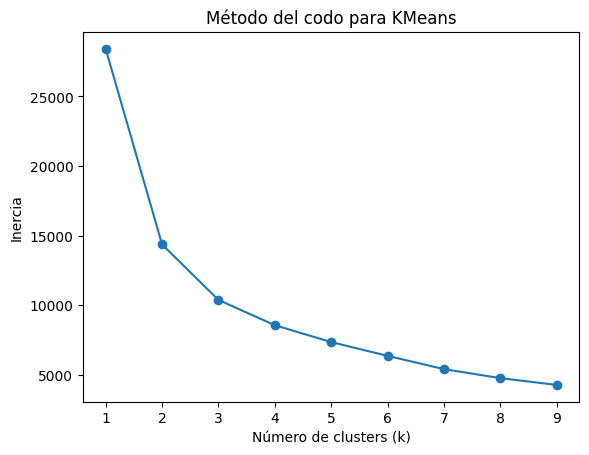

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[['bathrooms', 'bedrooms', 'beds']])

# Método del codo
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(K, inertia, 'o-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para KMeans')
plt.show()


In [20]:
#Modelo final con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Análisis por cluster
cluster_summary = df_cluster.groupby('cluster').agg({
    'bathrooms': 'mean',
    'bedrooms': 'mean',
    'beds': 'mean',
    'ocup%30': ['mean', 'count']
}).round(2)

cluster_summary.columns = ['bathrooms_mean', 'bedrooms_mean', 'beds_mean', 'ocup30_mean', 'count']
print(cluster_summary)


         bathrooms_mean  bedrooms_mean  beds_mean  ocup30_mean  count
cluster                                                              
0                  4.40           5.11       8.45        48.46    514
1                  1.16           1.21       1.75        58.31   6172
2                  2.05           2.98       4.55        54.83   2784


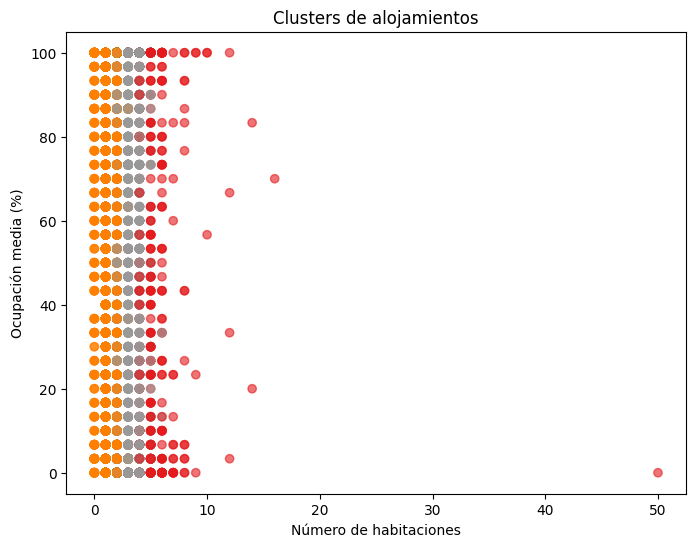

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df_cluster['bedrooms'], 
    df_cluster['ocup%30'], 
    c=df_cluster['cluster'], 
    cmap='Set1', 
    alpha=0.6
)
plt.title('Clusters de alojamientos')
plt.xlabel('Número de habitaciones')
plt.ylabel('Ocupación media (%)')
plt.show()


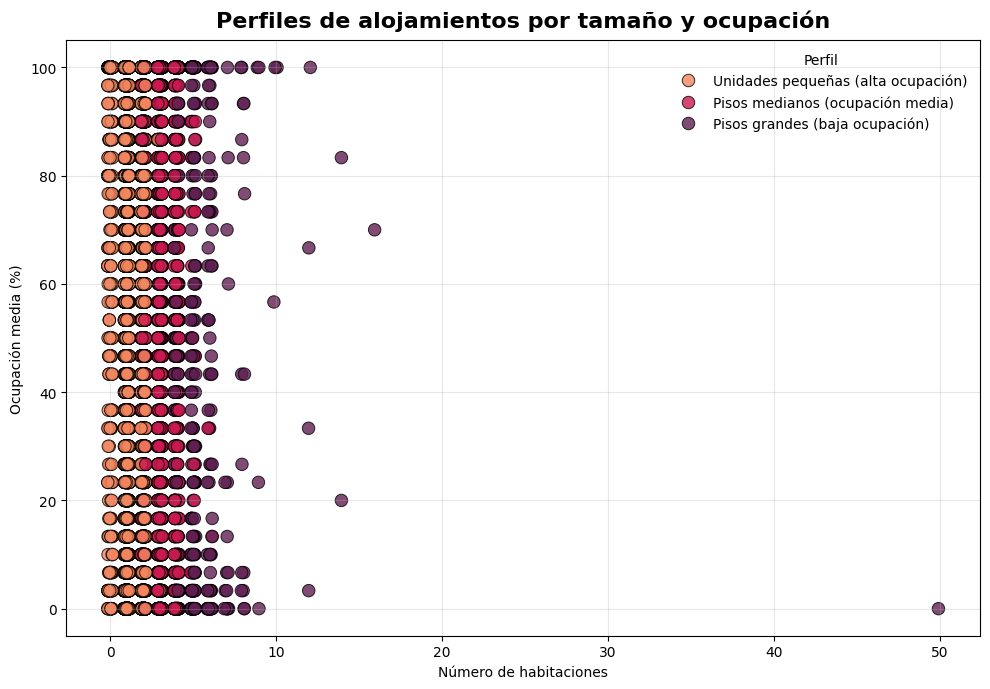

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ocup%30 existe
if 'ocup%30' not in df_cluster.columns:
    raise ValueError("No se encontró la columna 'ocup%30' en df_cluster")

# Etiquetas semánticas para los clusters
cluster_labels = {
    0: 'Pisos grandes (baja ocupación)',
    1: 'Unidades pequeñas (alta ocupación)',
    2: 'Pisos medianos (ocupación media)',
}
df_cluster['cluster_profile'] = df_cluster['cluster'].map(cluster_labels)

# Jitter en habitaciones para separar los puntos
df_plot = df_cluster.copy()
df_plot['bedrooms_j'] = df_plot['bedrooms'] + np.random.uniform(-0.15, 0.15, len(df_plot))

# Scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_plot,
    x='bedrooms_j',
    y='ocup%30',
    hue='cluster_profile',
    palette='rocket_r',
    s=80,
    alpha=0.8,
    edgecolor='black'
)
plt.title('Perfiles de alojamientos por tamaño y ocupación', fontsize=16, weight='bold', pad=10)
plt.xlabel('Número de habitaciones')
plt.ylabel('Ocupación media (%)')
plt.legend(title='Perfil', frameon=False, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


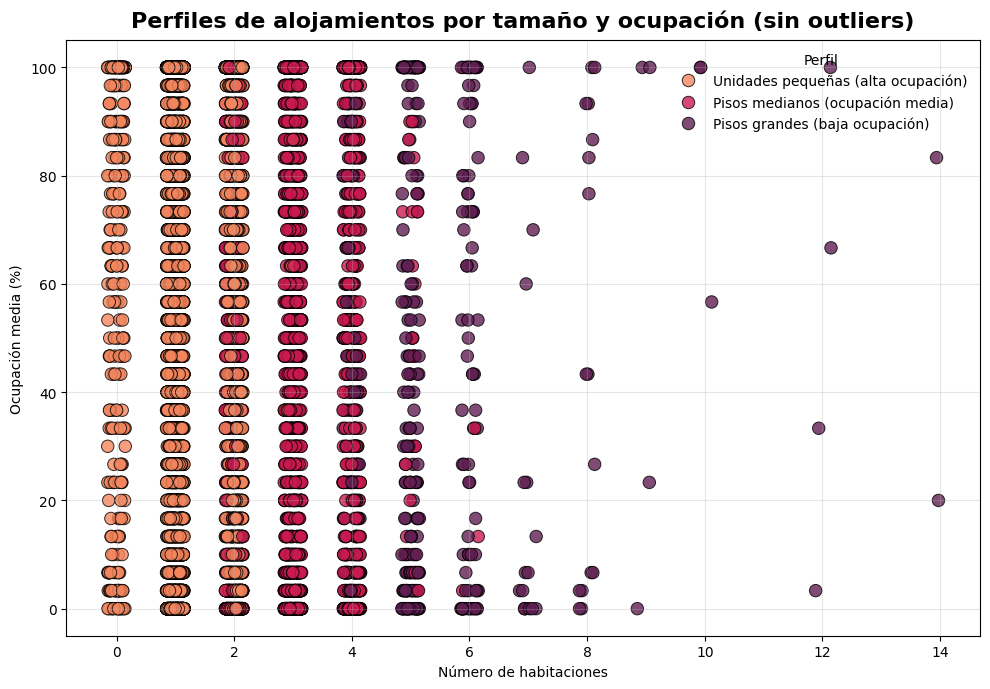

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que la columna exista
if 'ocup%30' not in df_cluster.columns:
    raise ValueError("No se encontró la columna 'ocup%30' en df_cluster")

# Etiquetas semánticas para los clusters
cluster_labels = {
    0: 'Pisos grandes (baja ocupación)',
    1: 'Unidades pequeñas (alta ocupación)',
    2: 'Pisos medianos (ocupación media)',
}
df_cluster['cluster_profile'] = df_cluster['cluster'].map(cluster_labels)

# Filtrar el outlier (por ejemplo, valores de bedrooms >= 15)
df_plot = df_cluster[df_cluster['bedrooms'] < 15].copy()

# Jitter para separar los puntos
df_plot['bedrooms_j'] = df_plot['bedrooms'] + np.random.uniform(-0.15, 0.15, len(df_plot))

# Scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_plot,
    x='bedrooms_j',
    y='ocup%30',
    hue='cluster_profile',
    palette='rocket_r',
    s=80,
    alpha=0.8,
    edgecolor='black'
)
plt.title('Perfiles de alojamientos por tamaño y ocupación (sin outliers)', fontsize=16, weight='bold', pad=10)
plt.xlabel('Número de habitaciones')
plt.ylabel('Ocupación media (%)')
plt.legend(title='Perfil', frameon=False, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


por city


In [24]:
# Conteo de alojamientos por ciudad y cluster
city_cluster_counts = df_operations.merge(
    df_cluster[['cluster']],
    left_index=True,
    right_index=True
).groupby(['city', 'cluster']).size().unstack(fill_value=0)

city_cluster_counts


cluster,0,1,2
city,,,
Barcelona,43,2105,475
Girona,122,686,670
Madrid,25,1751,318
Malaga,7,369,119
Mallorca,274,464,836
Menorca,32,79,106
Sevilla,6,369,114
Valencia,5,349,146


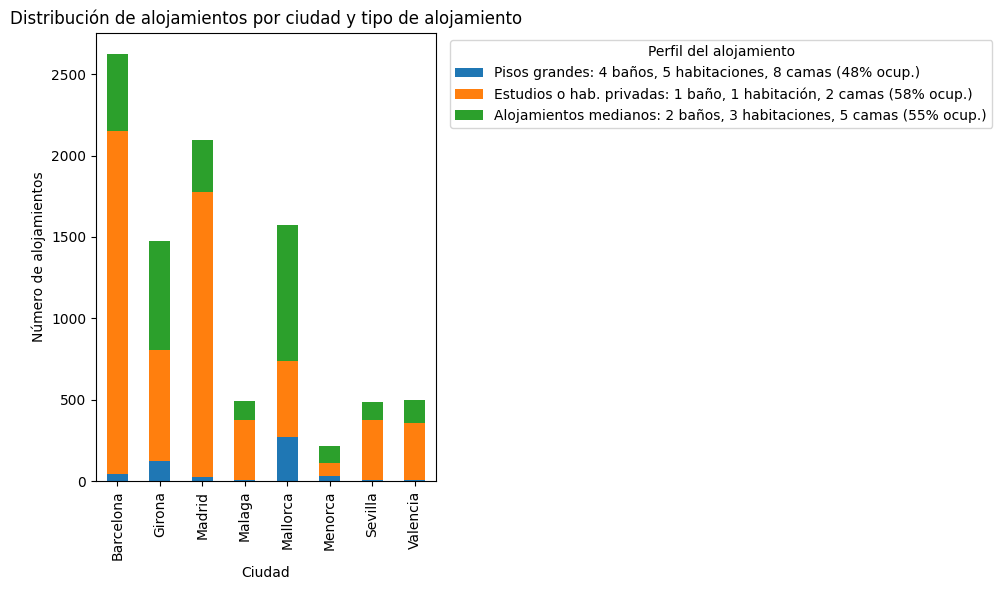

In [25]:
# Etiquetas detalladas según los valores promedio
cluster_labels = {
    0: 'Pisos grandes: 4 baños, 5 habitaciones, 8 camas (48% ocup.)',
    1: 'Estudios o hab. privadas: 1 baño, 1 habitación, 2 camas (58% ocup.)',
    2: 'Alojamientos medianos: 2 baños, 3 habitaciones, 5 camas (55% ocup.)'
}

# Renombra columnas en el DataFrame
city_cluster_counts = city_cluster_counts.rename(columns=cluster_labels)

# Gráfico actualizado
import matplotlib.pyplot as plt

city_cluster_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de alojamientos por ciudad y tipo de alojamiento')
plt.xlabel('Ciudad')
plt.ylabel('Número de alojamientos')
plt.legend(title='Perfil del alojamiento', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


post meet

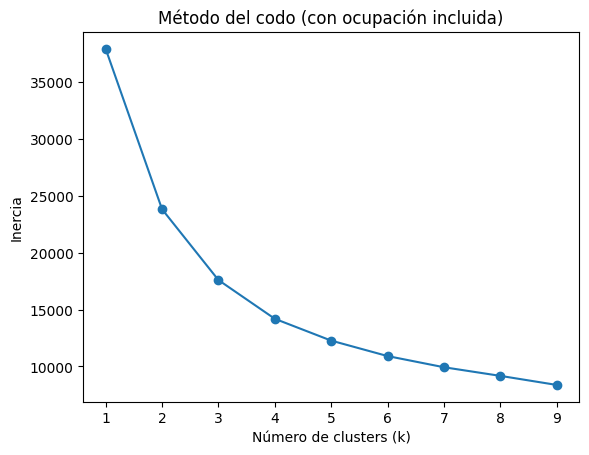

📊 Perfiles de clusters ordenados por mayor ocupación promedio:

         bathrooms_mean  bedrooms_mean  beds_mean  ocup30_mean  count
cluster                                                              
2                  1.25           1.43       2.03        88.55   4368
0                  2.96           3.90       6.24        55.56   1833
1                  1.30           1.52       2.28        14.93   3269

 Proporciones promedio por cluster:
         beds_per_bedroom  bathrooms_per_bedroom  ocup30_mean
cluster                                                      
2                    1.42                   0.87        88.55
0                    1.60                   0.76        55.56
1                    1.50                   0.86        14.93


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Selección y limpieza
vars_cluster = ['bathrooms', 'bedrooms', 'beds', 'ocup%30']
df_cluster = df_operations[vars_cluster].dropna()

# Escalado (todas las variables, incluida ocupación)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Método del codo para determinar K óptimo
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo (con ocupación incluida)')
plt.show()

# Entrenamos modelo con el K óptimo (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Análisis de los clusters
cluster_summary = df_cluster.groupby('cluster').agg({
    'bathrooms': 'mean',
    'bedrooms': 'mean',
    'beds': 'mean',
    'ocup%30': ['mean', 'count']
}).round(2)

cluster_summary.columns = ['bathrooms_mean', 'bedrooms_mean', 'beds_mean', 'ocup30_mean', 'count']
cluster_summary = cluster_summary.sort_values(by='ocup30_mean', ascending=False)

print("📊 Perfiles de clusters ordenados por mayor ocupación promedio:\n")
print(cluster_summary)

# Calculamos proporciones relativas (habitaciones / baños / camas)
proportion_summary = cluster_summary.copy()
proportion_summary['beds_per_bedroom'] = (cluster_summary['beds_mean'] / cluster_summary['bedrooms_mean']).round(2)
proportion_summary['bathrooms_per_bedroom'] = (cluster_summary['bathrooms_mean'] / cluster_summary['bedrooms_mean']).round(2)

print("\n Proporciones promedio por cluster:")
print(proportion_summary[['beds_per_bedroom', 'bathrooms_per_bedroom', 'ocup30_mean']])


In [27]:
import numpy as np

best = 2  # winning cluster id
cols = ['bathrooms','bedrooms','beds','ocup%30']
win = df_cluster[df_cluster['cluster']==best].copy()
win['beds_per_bedroom'] = win['beds'] / win['bedrooms'].replace(0, np.nan)
win['bathrooms_per_bedroom'] = win['bathrooms'] / win['bedrooms'].replace(0, np.nan)

def iqr_range(s):
    q1, q3 = np.nanpercentile(s, [25, 75])
    return round(q1,2), round(q3,2)

ranges = {
    'beds_per_bedroom_IQR': iqr_range(win['beds_per_bedroom']),
    'bathrooms_per_bedroom_IQR': iqr_range(win['bathrooms_per_bedroom']),
    'bedrooms_IQR': iqr_range(win['bedrooms']),
    'bathrooms_IQR': iqr_range(win['bathrooms']),
    'beds_IQR': iqr_range(win['beds']),
    'ocup%30_IQR': iqr_range(win['ocup%30'])
}
ranges


{'beds_per_bedroom_IQR': (np.float64(1.0), np.float64(2.0)),
 'bathrooms_per_bedroom_IQR': (np.float64(0.5), np.float64(1.0)),
 'bedrooms_IQR': (np.float64(1.0), np.float64(2.0)),
 'bathrooms_IQR': (np.float64(1.0), np.float64(1.0)),
 'beds_IQR': (np.float64(1.0), np.float64(3.0)),
 'ocup%30_IQR': (np.float64(76.67), np.float64(100.0))}

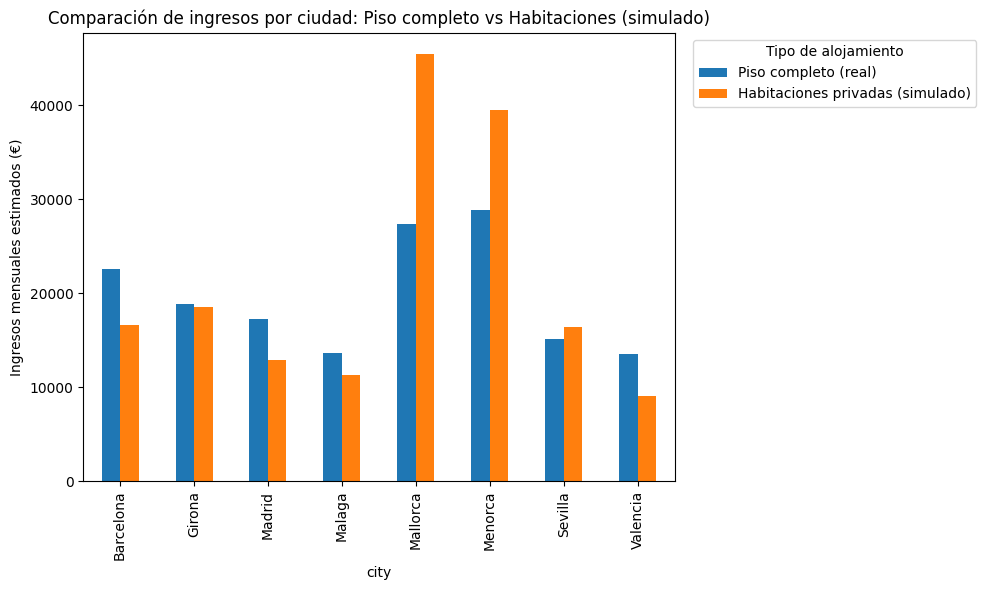

In [28]:
import matplotlib.pyplot as plt

# (1) Asegura la columna 'estimated_monthly_revenue'
df_operations['estimated_monthly_revenue'] = (
    df_operations['price'] * (df_operations['ocup%30'] / 100) * 30
)

# (2) Promedio de ingresos por tipo de habitación y ciudad
city_comparison = (
    df_operations[df_operations['room_type'].isin(['Entire Home Apt', 'Private Room'])]
    .groupby(['city', 'room_type'])['estimated_monthly_revenue']
    .mean()
    .unstack()
)

# (3) Promedio de habitaciones por ciudad (para la simulación)
avg_rooms = (
    df_operations[df_operations['room_type'] == 'Entire Home Apt']
    .groupby('city')['bedrooms']
    .mean()
    .reindex(city_comparison.index)
)

# (4) Simula ingresos de habitaciones privadas
city_comparison['simulated_private_revenue'] = (
    city_comparison['Private Room'] * avg_rooms
)

# (5) Renombra columnas para una leyenda más descriptiva
city_comparison = city_comparison.rename(columns={
    'Entire Home Apt': 'Piso completo (real)',
    'simulated_private_revenue': 'Habitaciones privadas (simulado)'
})

# (6) Gráfico final
city_comparison[['Piso completo (real)', 'Habitaciones privadas (simulado)']].plot(
    kind='bar',
    figsize=(10,6)
)
plt.title('Comparación de ingresos por ciudad: Piso completo vs Habitaciones (simulado)')
plt.ylabel('Ingresos mensuales estimados (€)')
plt.legend(title='Tipo de alojamiento', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


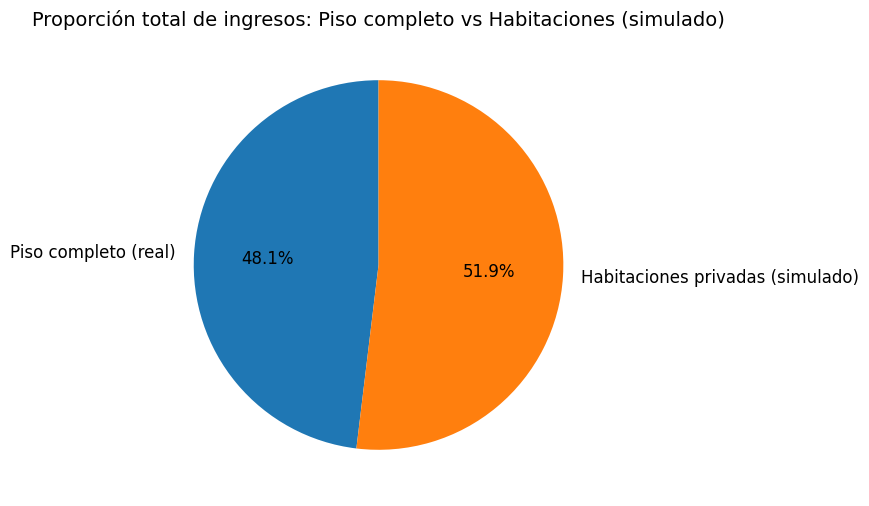

In [29]:
# (7) Gráfico de pastel: total de ingresos reales vs simulados
totales = city_comparison[['Piso completo (real)', 'Habitaciones privadas (simulado)']].sum()

plt.figure(figsize=(6,6))
plt.pie(
    totales,
    labels=totales.index,
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e'],  # mismos tonos azul y naranja
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Proporción total de ingresos: Piso completo vs Habitaciones (simulado)', fontsize=14)
plt.show()


Conclusion

El perfil que más ocupación genera es el de:
Alojamientos pequeños (1–2 habitaciones, 1 baño, 1–3 camas)
Con una relación 1–2 camas por dormitorio
Entre 0.5 y 1 baño por dormitorio
Alcanzan entre 77 % y 100 % de ocupación.